## ***Import Libraries***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

## ***Generate Imbalance Dataset***

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

## ***Features & labels***

In [4]:
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=0)

## ***Plot the dataset***

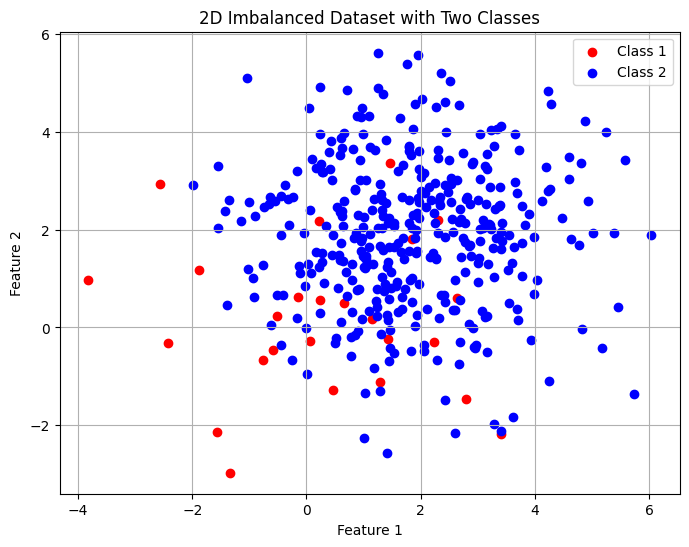

In [5]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

***The blue dots here are the majority class of the dataset & red ones are the minority class. Now, we will use the data to create a classification model. For that let's start with importing the libraries.***

In [6]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

### ***Split dataset into training and testing sets***

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### ***Initialize the classifier algorithm***




In [8]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### ***Predict test set***

In [9]:
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

### ***Print classification report***


In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.96      1.00      0.98       113

    accuracy                           0.96       120
   macro avg       0.98      0.64      0.71       120
weighted avg       0.96      0.96      0.95       120



### ***Print ROC AUC Score***

In [11]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

ROC AUC Score: 0.9557522123893806


### ***Plotting ROC-AUC Curve***

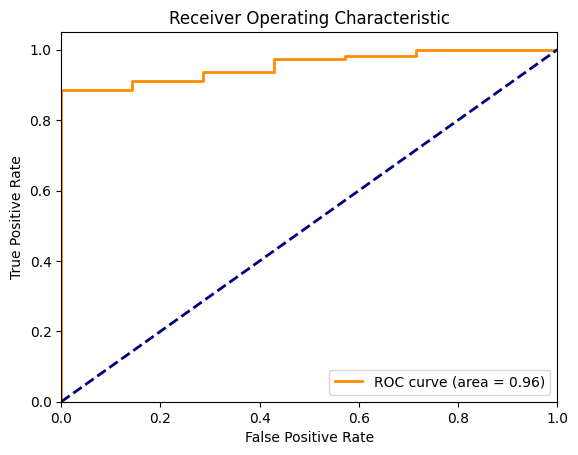

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### ***Plot Decision Boundaries***

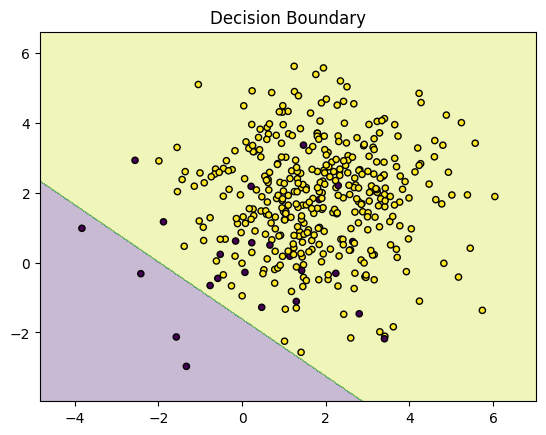

In [13]:
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, classifier)

***The model is unable to classify the majority & the minority class, this is the reason why it is somewhat biased towards the majority class of the dataset.Now, we'll start with the various methods of handling imbalance dataset.***

1.   Under Sample the majority class using Random Under Sampler
2.   Oversampling the minority class using Random Over Sampler
3.   SMOTE
4.   Balanced Random Forest
5.   Class Weights
6.   Custom Loss Function

### ***1. Under Sample the majority class using Random Under Sampler***

In [31]:
from imblearn.under_sampling import RandomUnderSampler

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

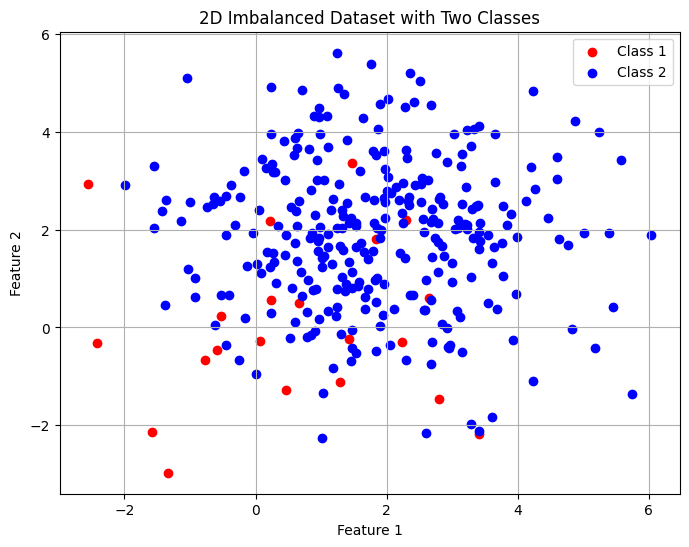

In [32]:
# Plotting the imbalaced dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

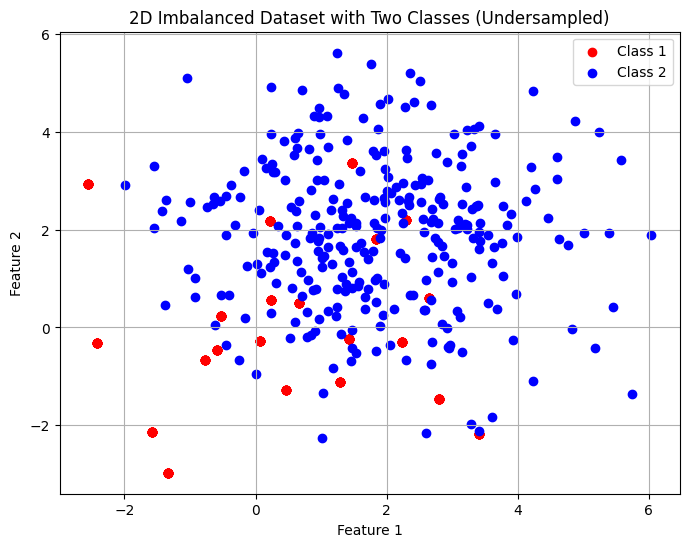

In [57]:
# Plotting the dataset after Random UnderSampling
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes (Undersampled)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#Checking the data
import pandas as pd

print("--------------------------------------")
print("X_train previously:", X_train.shape)
print("--------------------------------------")
print("X_train resampled:",X_resampled.shape)
print("--------------------------------------")
print("y_train previously:")
print(pd.Series(y_train).value_counts())
print("--------------------------------------")
print("y_train resampled:")
pd.Series(y_resampled).value_counts()

--------------------------------------
X_train previously: (320, 2)
--------------------------------------
X_train resampled: (42, 2)
--------------------------------------
y_train previously:
1    299
0     21
Name: count, dtype: int64
--------------------------------------
y_train resampled:


0    21
1    21
Name: count, dtype: int64

In [47]:
# Initialize and train LogisticRegression on undersampled data using RandomUnderSampler
classifier_ros = LogisticRegression()
classifier_ros.fit(X_resampled, y_resampled)

# Predict test set
y_pred_ros = classifier_ros.predict(X_test)
y_proba_ros = classifier_ros.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Under Sampling):")
print(classification_report(y_test, y_pred_ros))

Classification Report (With Under Sampling):
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80



ROC AUC Score (With Under Sampling): 0.9375
---------------------------------------------------------------------


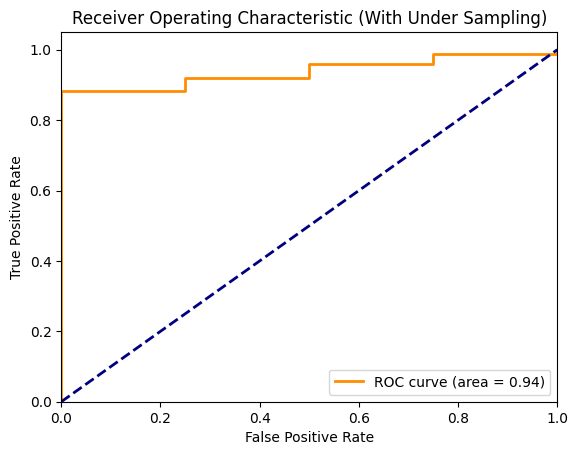

In [40]:
# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Under Sampling):", roc_auc_score(y_test, y_proba_ros))
print("---------------------------------------------------------------------")
# Plotting ROC AUC Curve for resampled data
fpr_ros, tpr_ros, _ = roc_curve(y_test, y_proba_ros)
plt.figure()
plt.plot(fpr_ros, tpr_ros, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_ros))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Under Sampling)')
plt.legend(loc="lower right")
plt.show()

### ***Plot Decision Boundaries using the Under Sampling Technique***

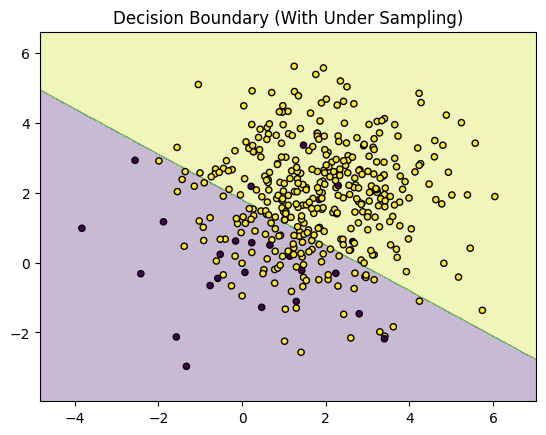

In [39]:
# Function to plot decision boundaries for resampled data
def plot_decision_boundaries_ros(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With Under Sampling)")
    plt.show()

# Plot decision boundary for resampled data
plot_decision_boundaries_ros(X, y, classifier_ros)

***The model is trying to learn the minority points, clearly seen from the decision boundary.***

###***2. Oversampling the minority class using Random Over Sampler***

In [41]:
from imblearn.over_sampling import RandomOverSampler

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

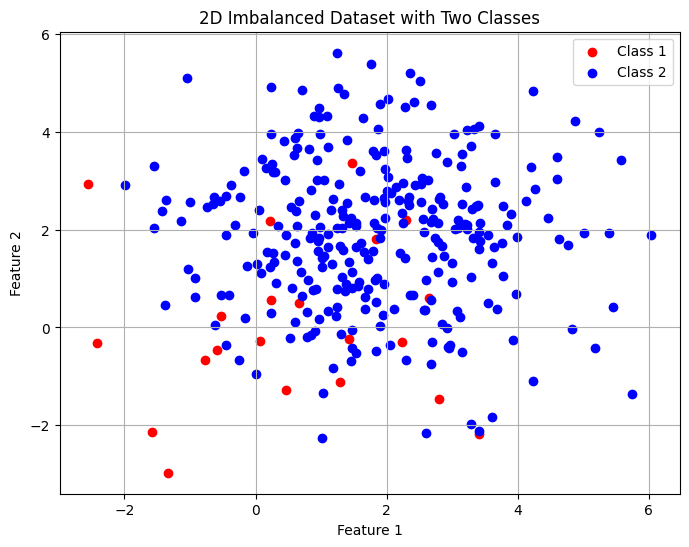

In [42]:
#Plotting the original dataset

plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

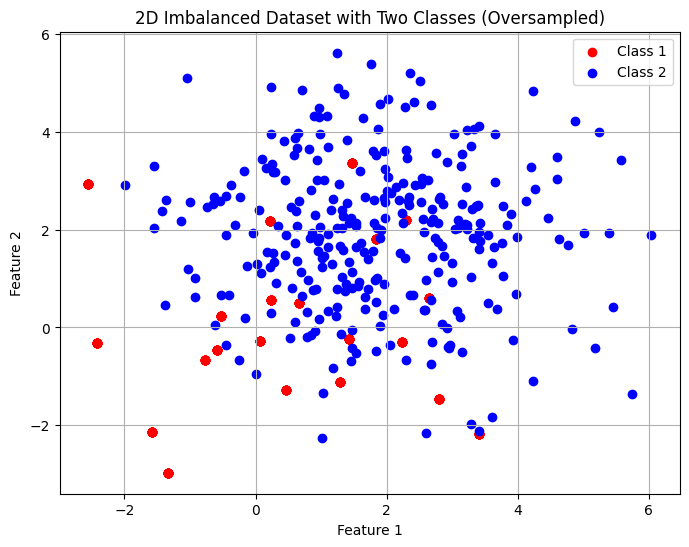

In [56]:
# Plotting the dataset after random oversampling
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes (Oversampled)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
#Checking the data after oversampling & comparing with the original one

print("--------------------------------------")
print("X_train previously:", X_train.shape)
print("--------------------------------------")
print("X_train resampled:",X_resampled.shape)
print("--------------------------------------")
print("y_train previously:")
print(pd.Series(y_train).value_counts())
print("--------------------------------------")
print("y_train resampled:")
pd.Series(y_resampled).value_counts()

--------------------------------------
X_train previously: (320, 2)
--------------------------------------
X_train resampled: (598, 2)
--------------------------------------
y_train previously:
1    299
0     21
Name: count, dtype: int64
--------------------------------------
y_train resampled:


1    299
0    299
Name: count, dtype: int64

In [48]:
# Initialize and train Logistic Regression on oversampled data using RandomOverSampler
classifier_ros = LogisticRegression()
classifier_ros.fit(X_resampled, y_resampled)

# Predict test set
y_pred_ros = classifier_ros.predict(X_test)
y_proba_ros = classifier_ros.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_ros))

Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80



ROC AUC Score (With OverSampling): 0.950657894736842
---------------------------------------------------------------------


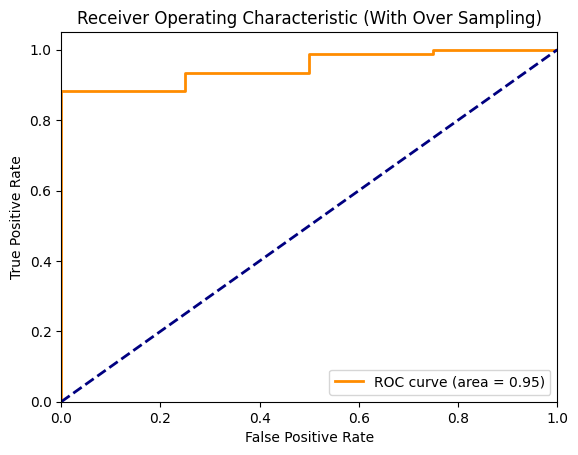

In [50]:
# Print ROC AUC Score for oversampled data
print("ROC AUC Score (With OverSampling):", roc_auc_score(y_test, y_proba_ros))
print("---------------------------------------------------------------------")
# Plotting ROC AUC Curve for resampled data
fpr_ros, tpr_ros, _ = roc_curve(y_test, y_proba_ros)
plt.figure()
plt.plot(fpr_ros, tpr_ros, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_ros))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Over Sampling)')
plt.legend(loc="lower right")
plt.show()

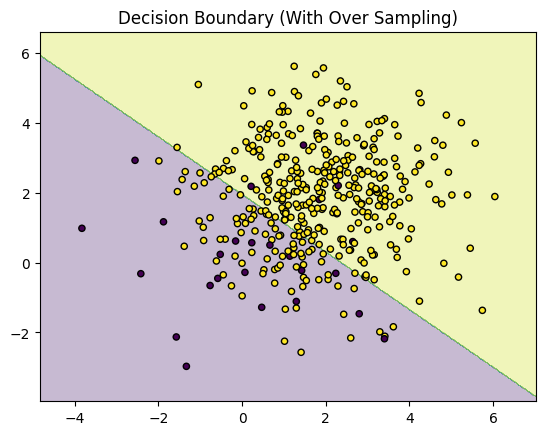

In [52]:
# Function to plot decision boundaries for oversampled data
def plot_decision_boundaries_ros(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With Over Sampling)")
    plt.show()

# Plot decision boundary for resampled data
plot_decision_boundaries_ros(X, y, classifier_ros)

### ***3. SMOTE (Synthetic Minority Oversampling Technique)***

In [53]:
from imblearn.over_sampling import SMOTE

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

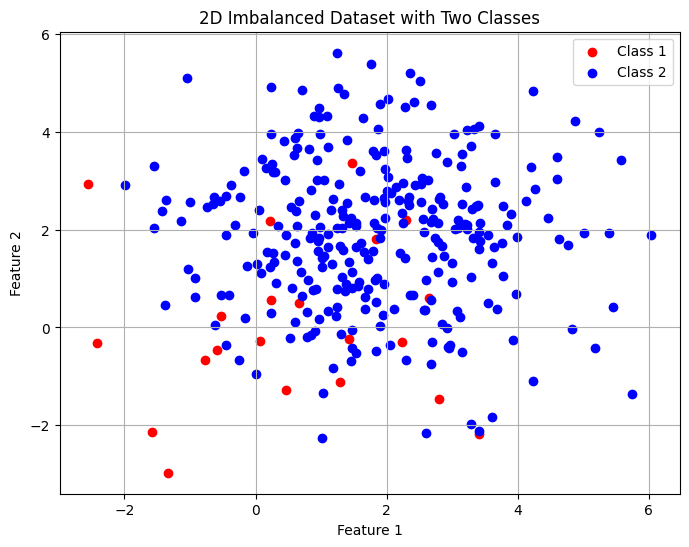

In [54]:
# Plotting the original dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

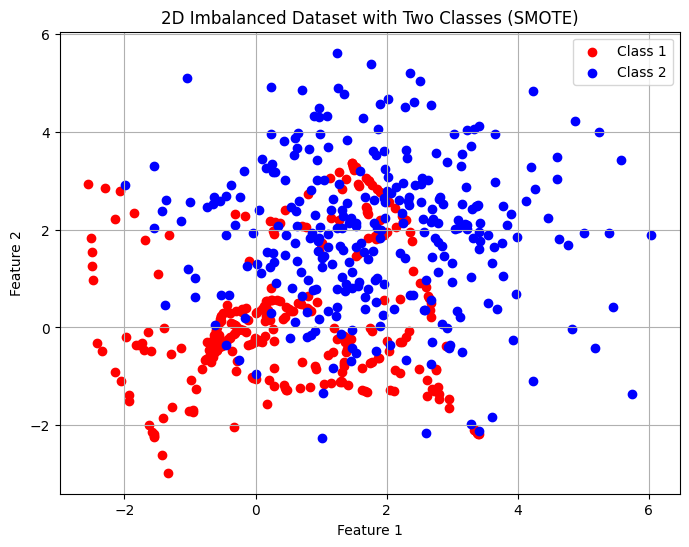

In [58]:
# Plotting the dataset after using SMOTE
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_smote[y_resampled_smote == 0][:, 0], X_resampled_smote[y_resampled_smote == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled_smote[y_resampled_smote == 1][:, 0], X_resampled_smote[y_resampled_smote == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes (SMOTE)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
#Checking the data after SMOTE & comparing with the original one

print("--------------------------------------")
print("X_train previously:", X_train.shape)
print("--------------------------------------")
print("X_train resampled:",X_resampled.shape)
print("--------------------------------------")
print("y_train previously:")
print(pd.Series(y_train).value_counts())
print("--------------------------------------")
print("y_train resampled:")
pd.Series(y_resampled).value_counts()

--------------------------------------
X_train previously: (320, 2)
--------------------------------------
X_train resampled: (598, 2)
--------------------------------------
y_train previously:
1    299
0     21
Name: count, dtype: int64
--------------------------------------
y_train resampled:


1    299
0    299
Name: count, dtype: int64

In [60]:
# Initialize and train LogisticRegression classifier on resampled data
classifier_smote = LogisticRegression()
classifier_smote.fit(X_resampled_smote, y_resampled_smote)

# Predict test set
y_pred_smote = classifier_smote.predict(X_test)
y_proba_smote = classifier_smote.predict_proba(X_test)[:, 1]


In [61]:
# Print classification report for SMOTE data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_proba_smote))


Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.17      1.00      0.30         4
           1       1.00      0.75      0.86        76

    accuracy                           0.76        80
   macro avg       0.59      0.88      0.58        80
weighted avg       0.96      0.76      0.83        80

ROC AUC Score (With SMOTE): 0.950657894736842


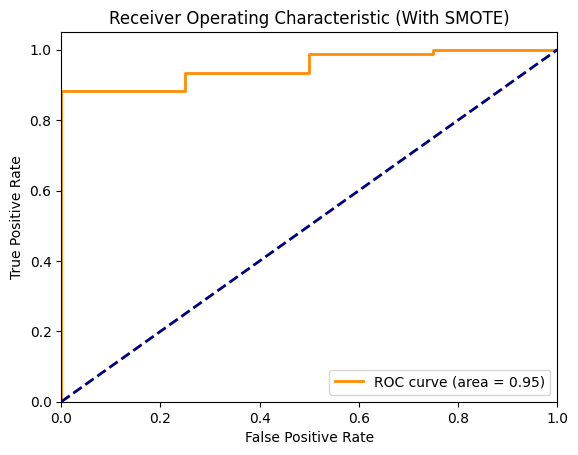

In [62]:
# Plotting ROC AUC Curve for SMOTE data
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
plt.figure()
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE)')
plt.legend(loc="lower right")
plt.show()

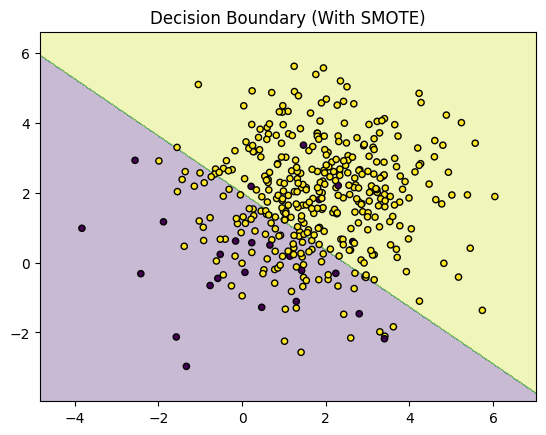

In [64]:
# Function to plot decision boundaries for SMOTE data
def plot_decision_boundaries_smote(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With SMOTE)")
    plt.show()


# Plot decision boundary for SMOTE data
plot_decision_boundaries_smote(X, y, classifier_smote)

***With SMOTE the model is well identifying the minority class, as seen from the decision boundary plotted.***

### ***4. Balanced Random Forest***

In [65]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying BalancedRandomForestClassifier
classifier = BalancedRandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

BalancedRandomForestClassifier(random_state=42)

In [68]:
# Predict test set
y_pred_brf = classifier.predict(X_test)
y_proba_brf = classifier.predict_proba(X_test)[:, 1]

# Print classification report for SMOTE data
print("Classification Report (With Balanced Random Forest Classifier):")
print(classification_report(y_test, y_pred_brf))

Classification Report (With Balanced Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.16      0.75      0.26         4
           1       0.98      0.79      0.88        76

    accuracy                           0.79        80
   macro avg       0.57      0.77      0.57        80
weighted avg       0.94      0.79      0.85        80



ROC AUC Score (With Balanced Random Forest Classifier): 0.8519736842105262
------------------------------------------------------------------------------------------------------------------------


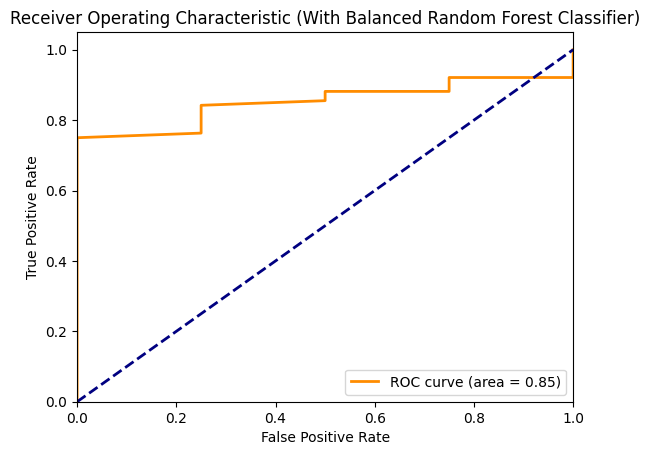

In [70]:
# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (With Balanced Random Forest Classifier):", roc_auc_score(y_test, y_proba_brf))
print("------------------------------------------------------------------------------------------------------------------------")
# Plotting ROC AUC Curve for SMOTE data
fpr_brf, tpr_brf, _ = roc_curve(y_test, y_proba_brf)
plt.figure()
plt.plot(fpr_brf, tpr_brf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_brf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Balanced Random Forest Classifier)')
plt.legend(loc="lower right")
plt.show()

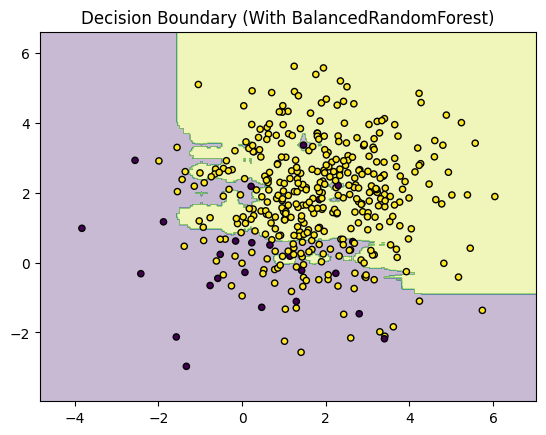

In [72]:
# Function to plot decision boundaries for SMOTE data
def plot_decision_boundaries_BalancedRandomForest(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With BalancedRandomForest)")
    plt.show()

# Plot decision boundary for BalancedRandomForest data
plot_decision_boundaries_BalancedRandomForest(X, y, classifier)

### ***5. Class Weights***

In [73]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model with class weights (Logistic Regression has in-built hyperparameter to deal with class weight whether to give which class more weight)
model = LogisticRegression(class_weight={0:50,1:1}, solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.09      1.00      0.16         7
           1       1.00      0.37      0.54       113

    accuracy                           0.41       120
   macro avg       0.54      0.69      0.35       120
weighted avg       0.95      0.41      0.52       120



ROC AUC Score: 0.9070796460176991
--------------------------------------------------------------------------------------------------------


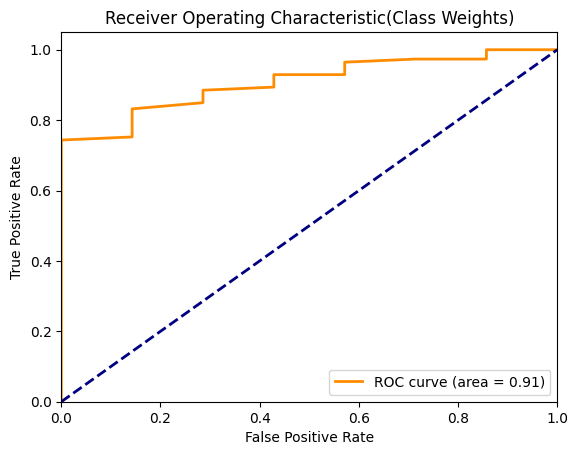

In [76]:
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("--------------------------------------------------------------------------------------------------------")

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(Class Weights)')
plt.legend(loc="lower right")
plt.show()

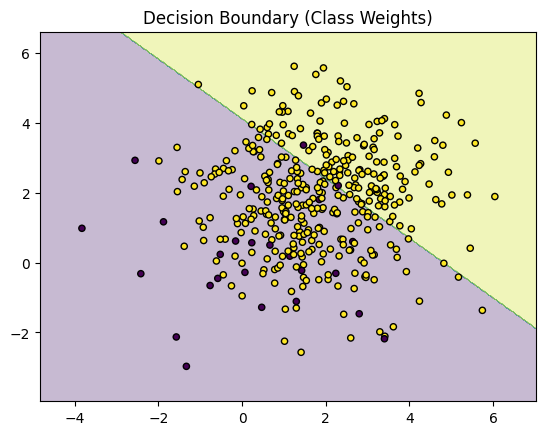

In [77]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (Class Weights)")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, model)


### ***6. Custom Loss Function***

In [78]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

In [79]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def custom_loss(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))  # Convert to probability

    # Define penalties
    false_positive_penalty = 10
    false_negative_penalty = 1.0

    grad = (preds - labels) * ((labels == 1) * false_negative_penalty + (labels == 0) * false_positive_penalty)
    hess = preds * (1 - preds) * ((labels == 1) * false_negative_penalty + (labels == 0) * false_positive_penalty)
    return grad, hess

In [80]:
# Convert to DMatrix object
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'silent': 1,
}

In [81]:
# Train the model
bst = xgb.train(params, dtrain, num_boost_round=10, obj=custom_loss)

# Predict test set
y_pred = np.where(bst.predict(dtest) > 0.5, 1, 0)
y_proba = bst.predict(dtest)  # Probability predictions

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:50:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [82]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print ROC AUC Score
auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc_score)

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.57      0.27         7
           1       0.97      0.83      0.90       113

    accuracy                           0.82       120
   macro avg       0.57      0.70      0.58       120
weighted avg       0.92      0.82      0.86       120

ROC AUC Score: 0.7319848293299621


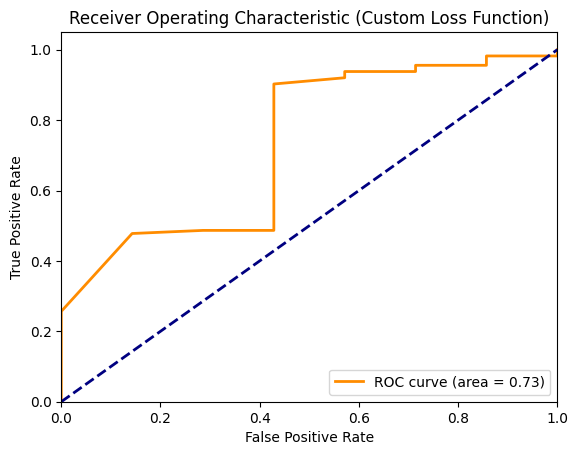

In [83]:
# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Custom Loss Function)')
plt.legend(loc="lower right")
plt.show()

In [84]:
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()]))
    Z = np.where(Z > 0.5, 1, 0).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (Custom Loss Function)")
    plt.show()

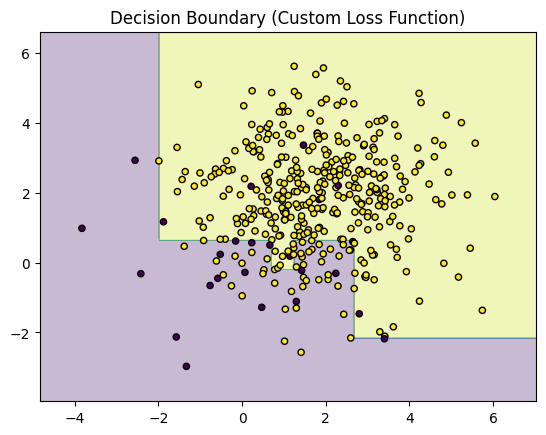

In [85]:
# Plot decision boundary
plot_decision_boundaries(X, y, bst)